# 0. Import packages

In [4]:
import numpy as np #for vectorized numerical calculations
import pandas as pd #for data handling
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization
from sklearn import metrics #for metrics to evaluate the models


## Read Data

In [6]:
life_exp = pd.read_csv('LifeExpectancyData.csv')

## Explore Data

In [7]:
life_exp.shape

(2938, 22)

In [8]:
life_exp.head() #shows first 5 elements

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
life_exp.info() #gives information about the fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
life_exp.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Data Preprocessing

In [11]:
life_exp.drop(columns=['Country', 'Status'], inplace=True)

In [12]:
#Change column names for conveniency
life_exp.rename(columns = {" BMI " :"BMI",
  "Life expectancy ": "Life_expectancy",
  "Adult Mortality":"Adult_mortality",
  "infant deaths":"Infant_deaths",
  "percentage expenditure":"Percentage_expenditure",
  "Hepatitis B":"HepatitisB",
  "Measles ":"Measles",
  "under-five deaths ": "Under_five_deaths",
  "Total expenditure":"Total_expenditure",
  "Diphtheria ": "Diphtheria",
  " thinness 1–19 years":"Thinness_1–19_years",
  " thinness 5–9 years":"Thinness_5–9_years",
  " HIV/AIDS":"HIV/AIDS",
  "Income composition of resources":
  "Income_composition_of_resources"}, inplace = True)

## Correlation Hearmap

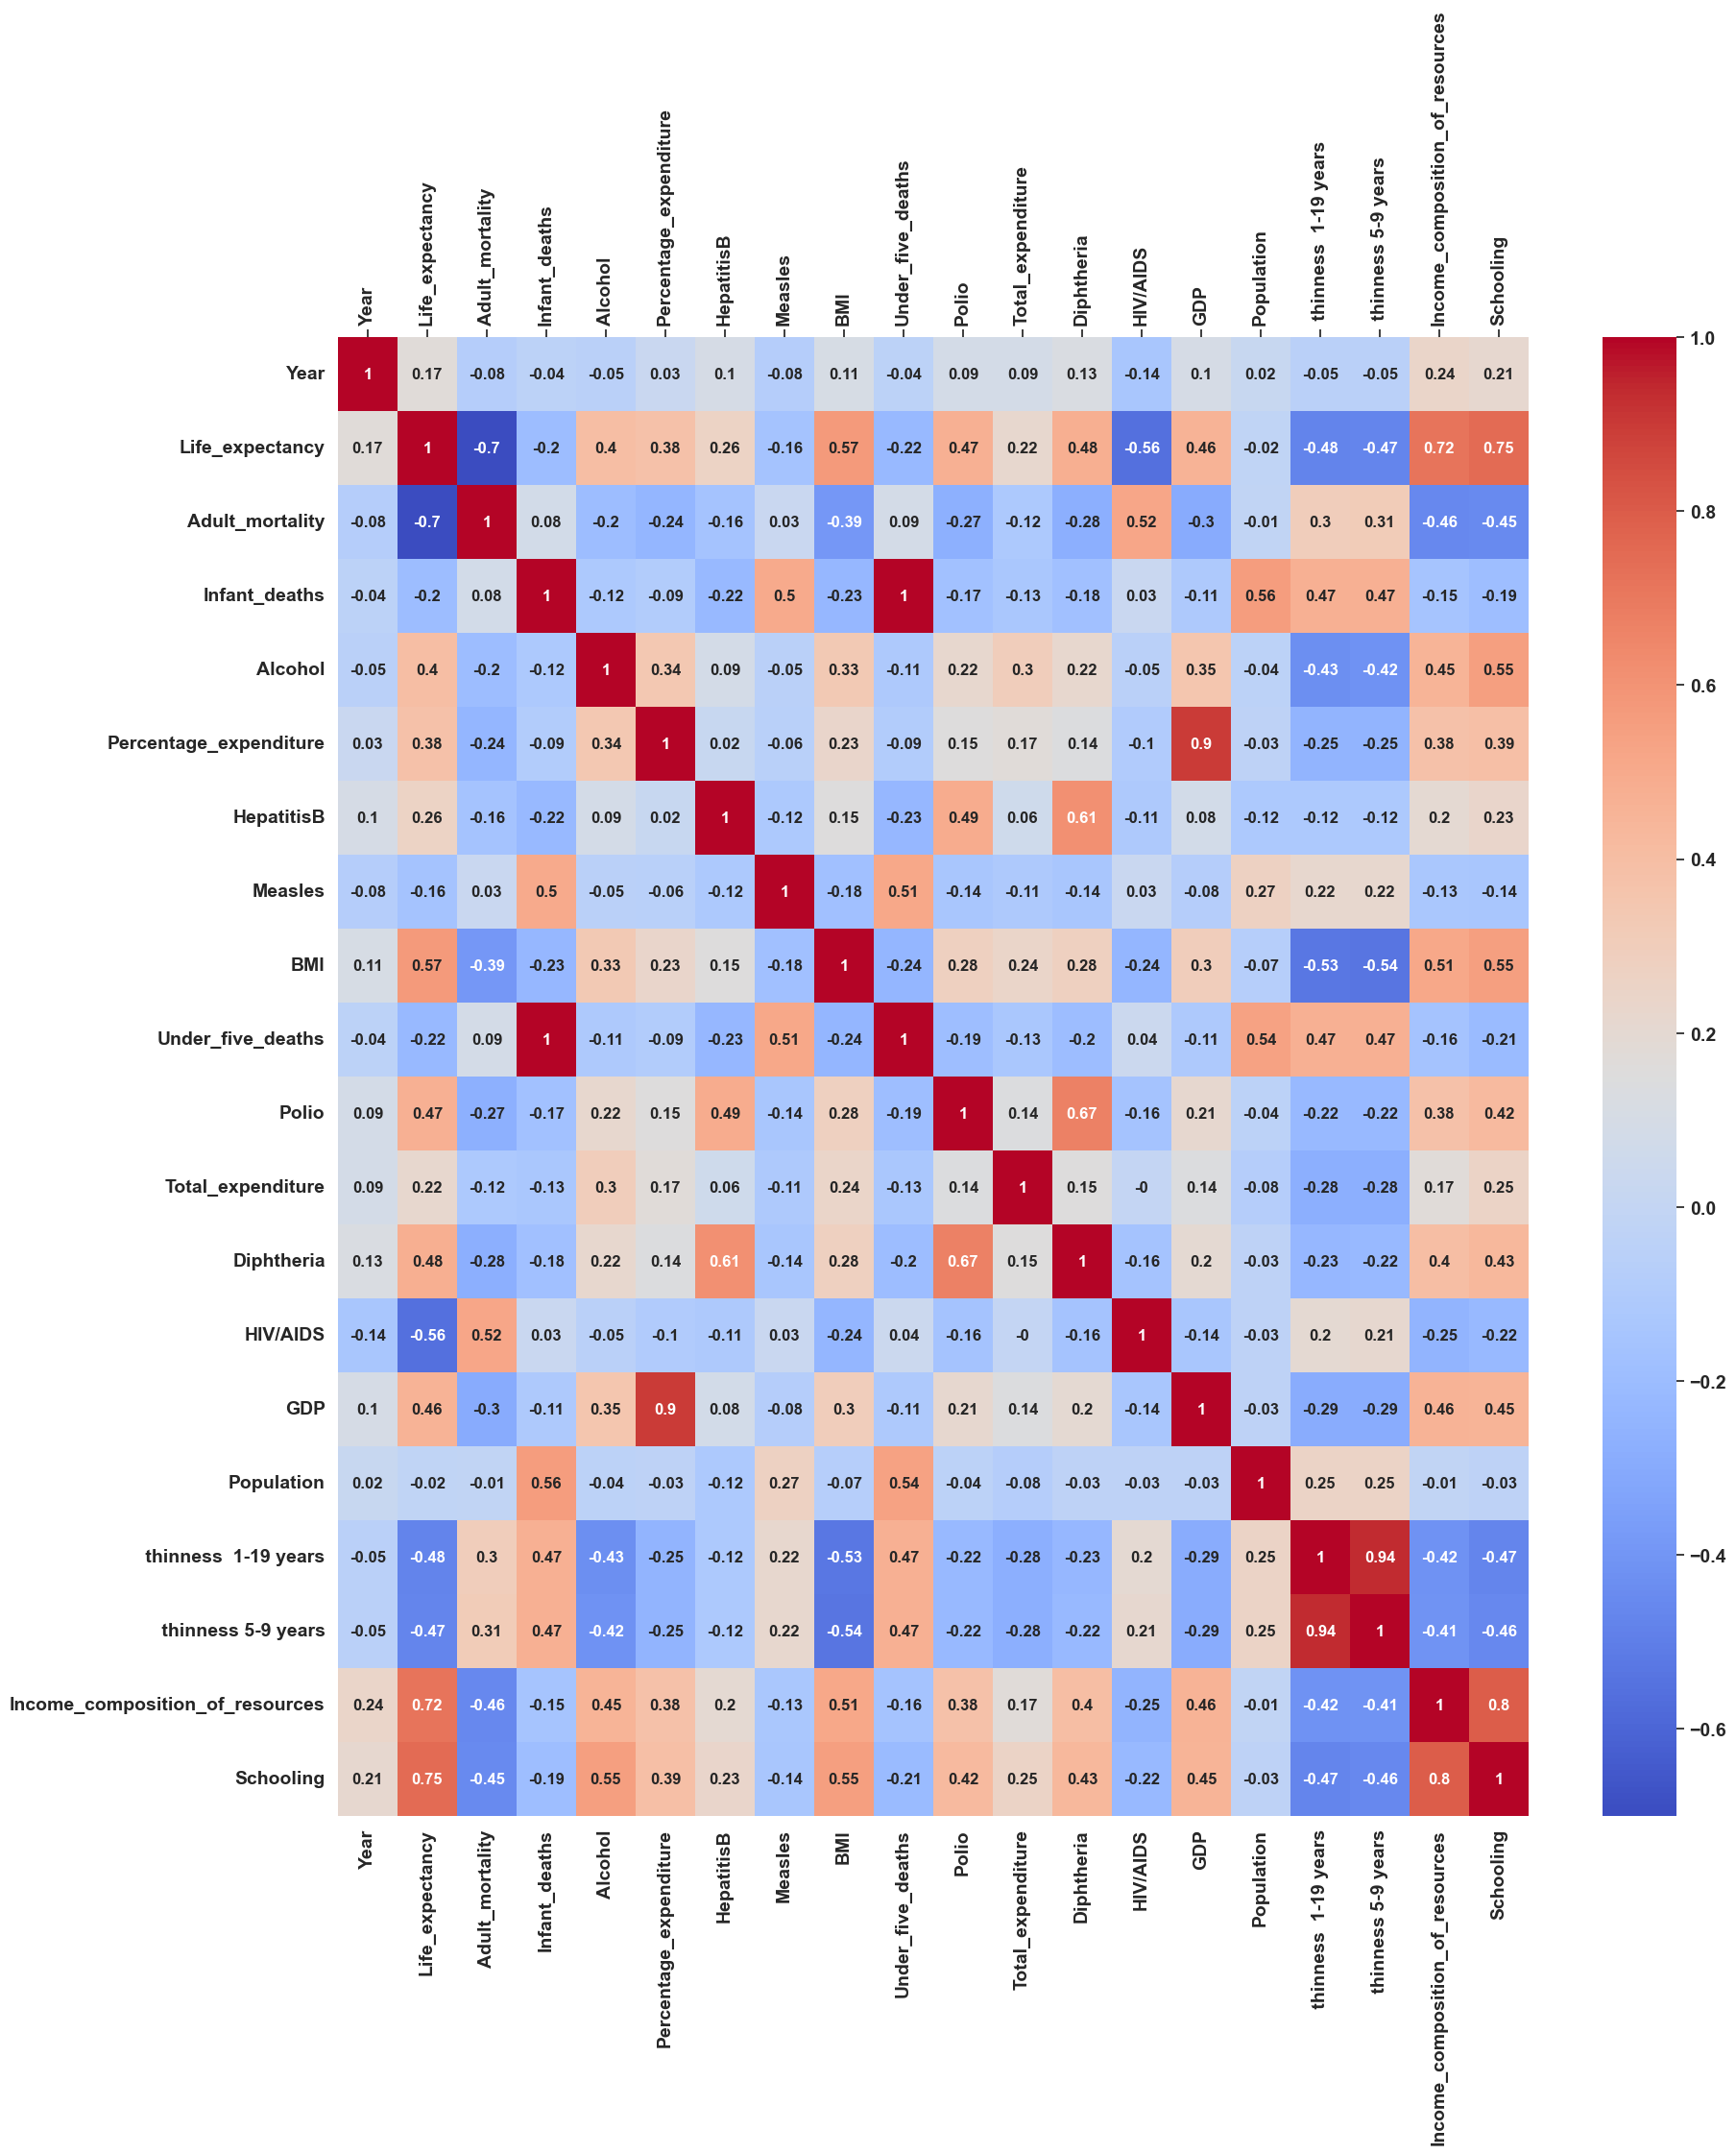

In [13]:
sns.set(rc = {'figure.figsize':(20,20), 
              'font.weight': 'bold', 
              'font.size': 12, 
              'xtick.labelsize': 14, 
              'ytick.labelsize': 14, 
              'xtick.top': True, 
              'xtick.labeltop': True})
ax = sns.heatmap(life_exp.corr().round(2), 
                 annot=True, 
                 cmap="coolwarm") #visualizing the correlation between the variables (how do they influence each other)
plt.savefig('corr.png', bbox_inches='tight')

## Handling data

In [14]:
X = life_exp
Y = life_exp["Life_expectancy"]

In [15]:
X.head()

,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [16]:
Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life_expectancy, dtype: float64

Handling missing values

In [17]:
X.isnull().sum() #alias for isna -- checks the number of empty, nan, nat, ... elements

Year                                 0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [18]:
#There are many ways to fill missing values: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
def fillmissing(df, feature, method):
  if method == "mode":
    df[feature] = df[feature].fillna(df[feature].mode()[0])
  elif method == "median":
    df[feature] = df[feature].fillna(df[feature].median())
  else:
    df[feature] = df[feature].fillna(df[feature].mean())

#We'll use the mean value
features_missing = X.columns[X.isna().any()]
for feature in features_missing:
  fillmissing(X, feature= feature, method= "mean")

#for Y we'll use the median value
Y.fillna(Y.median(), inplace=True)

In [19]:
Y = np.array(Y)

In [20]:
X.isnull().sum() #no more missing values

Year                               0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

# **LINEAR REGRESSION**

**x** - data \
**y** - label

If we have **n** datapoints, then our data and label matrix will look like this.

$ \underset{{({{n,}}2)}}{x}=\begin{bmatrix}{1} & x^{\left(1\right)}\\ \begin{matrix}{\begin{matrix}{1}\\ ...\end{matrix}}\\ 1\end{matrix} & \begin{matrix}{\begin{matrix}{x^{\left(2\right)}}\\ ...\end{matrix}}\\ x^{\left(n\right)}\end{matrix}\end{bmatrix}, \underset{{\left(n,1\right)}}{y}=\begin{bmatrix}{y^{\left(1\right)}}\\ \begin{matrix}{\begin{matrix}{y^{\left(2\right)}}\\ ...\end{matrix}}\\ y^{\left(n\right)}\end{matrix}\end{bmatrix} $

We want to find $ \underset{{(2,1)}}{\theta}=\begin{bmatrix}{\theta_0}\\ \theta_1\end{bmatrix} $ for $ h(x) = \hat{y} = \theta x $

If we substitute our ***x*** and $\mathit{\mathbf{\theta}}$ in our hypothesis function we will get:

$ h(x)=\begin{bmatrix}{1^{}\cdot\theta_0}+x^{\left(1\right)}\theta_1\\ \begin{matrix}{\begin{matrix}{{1^{}\cdot\theta_0}+x^{\left(2\right)}\theta_1}\\ ...\end{matrix}}\\ {1^{}\cdot\theta_0}+x^{\left(200\right)}\theta_1\end{matrix}\end{bmatrix} $

In case of linear regression we can use the ***Normal Equation*** to calculate the optimal theta

$ \theta^*= (X^TX)^{-1}(X^TY) $

# **2 . Linear Regression with Tim**

In [17]:
tim_data = X['BMI']
tim_data.head()

0    19.1
1    18.6
2    18.1
3    17.6
4    17.2
Name: BMI, dtype: float64

### Visualzing Life expectancy vs BMI plot

Text(0, 0.5, 'Life Expectency')

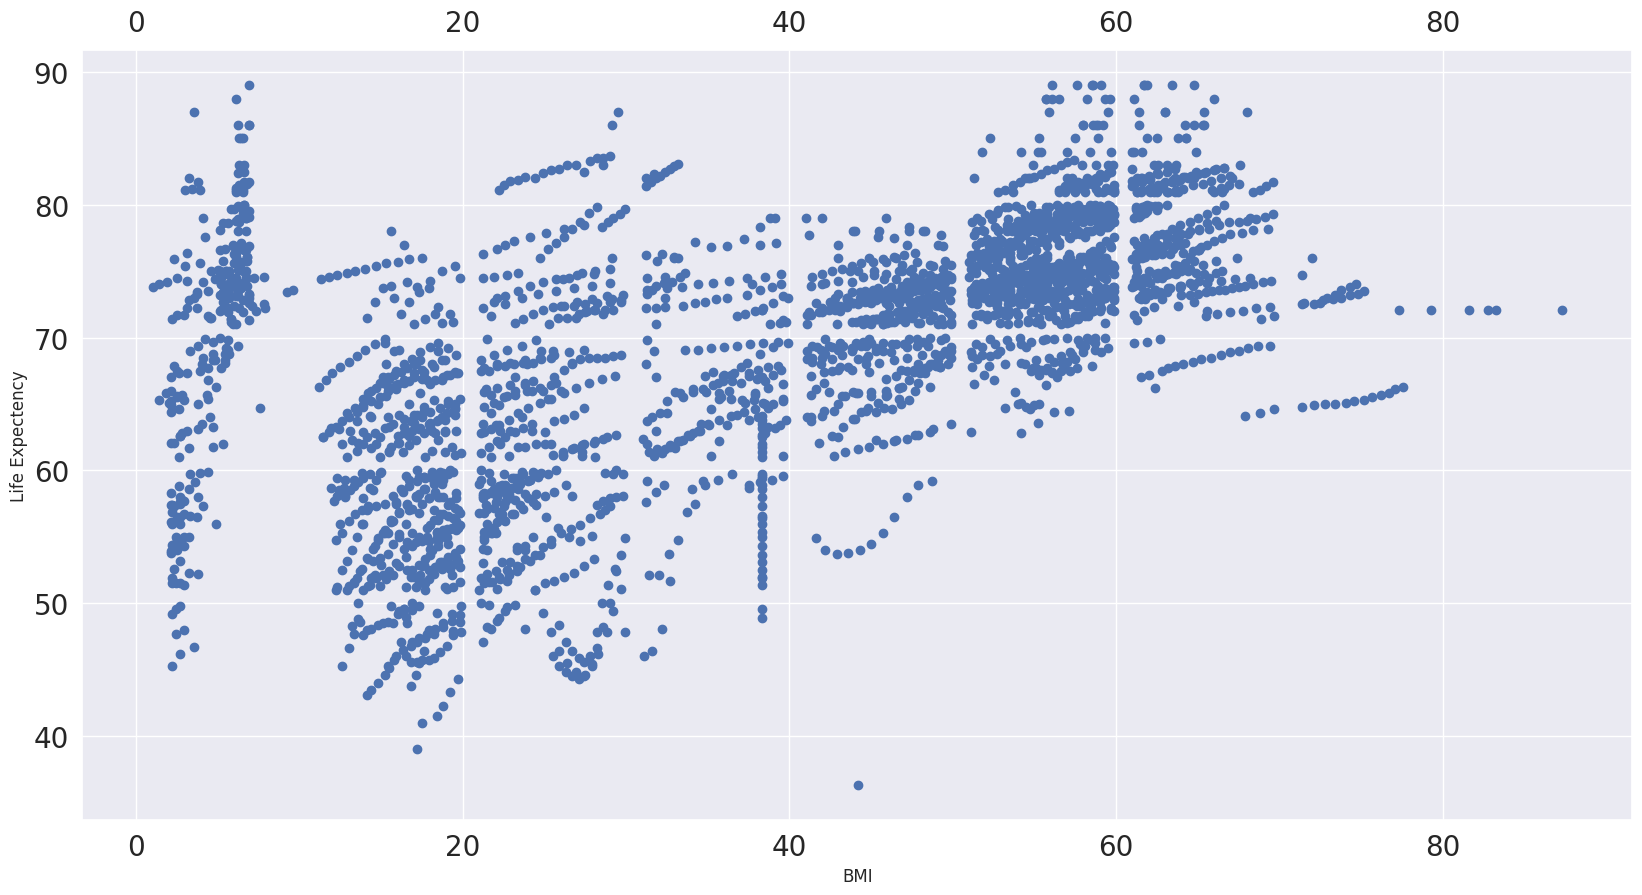

In [18]:
sns.set(rc = {'figure.figsize':(20,10), 'font.weight': 'regular', 'font.size': 12, 'xtick.labelsize': 20, 'ytick.labelsize': 20})
plt.scatter(X['BMI'], X['Life_expectancy'])
plt.xlabel('BMI')
plt.ylabel('Life Expectency')

## Preprocessing data

In [19]:
tim_data

0       19.1
1       18.6
2       18.1
3       17.6
4       17.2
        ... 
2933    27.1
2934    26.7
2935    26.3
2936    25.9
2937    25.5
Name: BMI, Length: 2938, dtype: float64

In [20]:
def preprocess(X):
    return np.stack((np.ones(X.shape), X)).T

tim_data_ready = preprocess(tim_data.to_numpy())
tim_data_ready.shape

(2938, 2)

In [21]:
tim_data_ready

array([[ 1. , 19.1],
       [ 1. , 18.6],
       [ 1. , 18.1],
       ...,
       [ 1. , 26.3],
       [ 1. , 25.9],
       [ 1. , 25.5]])

In [22]:
def normal_equation(X,Y):
    return np.linalg.inv(X.T @ X) @ (X.T @ Y)

tim_theta = normal_equation(tim_data_ready, Y)
print(f'y = mx + b')
print(f'y = {tim_theta[1]}x + {tim_theta[0]}')

y = mx + b
y = 0.2674376847702379x + 58.986172038321655


Text(0, 0.5, 'Life Expectency')

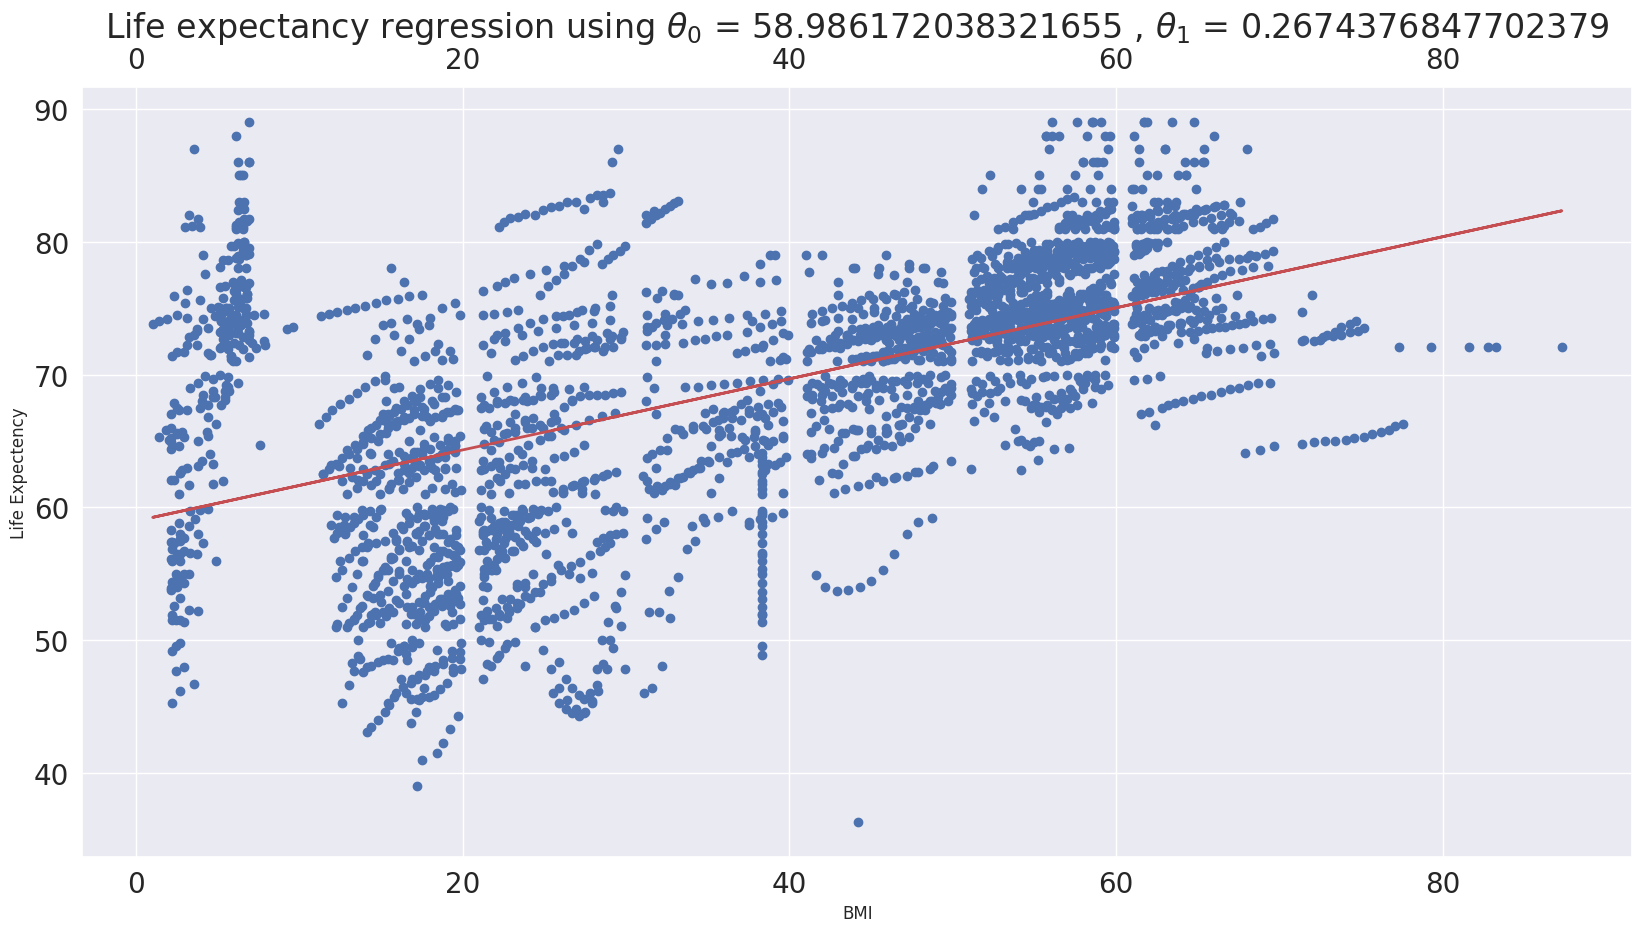

In [23]:
plt.title('Life expectancy regression using $\\theta_0$ = {} , $\\theta_1$ = {}'.format(tim_theta[0], tim_theta[1]), fontsize=24)
plt.scatter(tim_data,Y, marker='o')
plt.plot(tim_data,np.dot(tim_data_ready, tim_theta), color='r', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Life Expectency')

In [24]:
def life_expectancy(X, theta):
    return np.concatenate([[1], X]) @ theta

height = 1.82 #float(input("Please input your height (in meters): ")) #1.82
weight = 80 #float(input("Please input your weight (in kilograms): ")) #80
bmi = weight / height**2
print("BMI:", bmi)
life_exp_tim = life_expectancy([bmi], tim_theta)
print("Tim's life expectancy is", life_exp_tim.round(1) , "years.")

BMI: 24.151672503320853
Tim's life expectancy is 65.4 years.


In [25]:
height = 1.80 #float(input("Please input your height (in meters): ")) #1.82
weight = 73 #float(input("Please input your weight (in kilograms): ")) #80
bmi = weight / height**2
print("BMI:",bmi)
life_exp_tim_tom = life_expectancy([bmi], tim_theta)
print("Tom's life expectancy predicted by Tim's model is", life_exp_tim_tom.round(1) , "years.")

BMI: 22.530864197530864
Tom's life expectancy predicted by Tim's model is 65.0 years.


# **3. Linear Regression with Tom**

In [26]:
tom_data = X['GDP'].to_numpy()
tom_data

array([584.25921  , 612.696514 , 631.744976 , ...,  57.34834  ,
       548.587312 , 547.3588785])

## Visualzing Life expectancy vs GDP plot

Text(0, 0.5, 'Life expectancy')

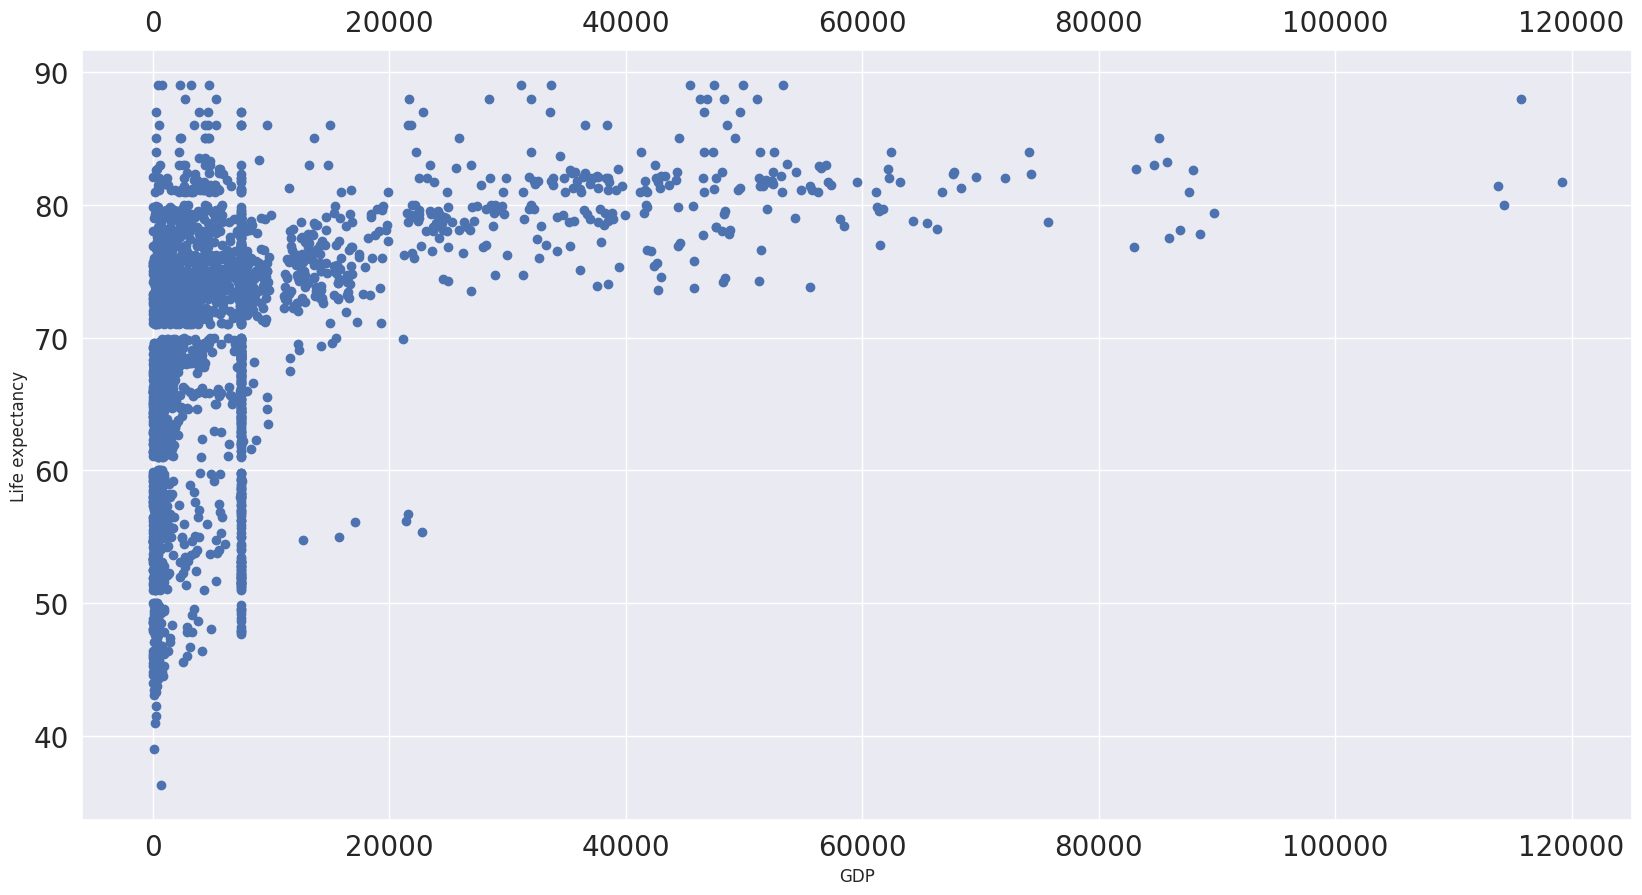

In [27]:
plt.scatter(tom_data, Y)
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

## Preprocessing data

In [28]:
tom_data_ready = preprocess(tom_data)
tom_data_ready.shape

(2938, 2)

In [29]:
tom_theta = normal_equation(tom_data_ready, Y)
print(f'y = mx + b')
print(f'y = {tom_theta[1]}x + {tom_theta[0]}')

y = mx + b
y = 0.0003114096238676796x + 66.90438993067784


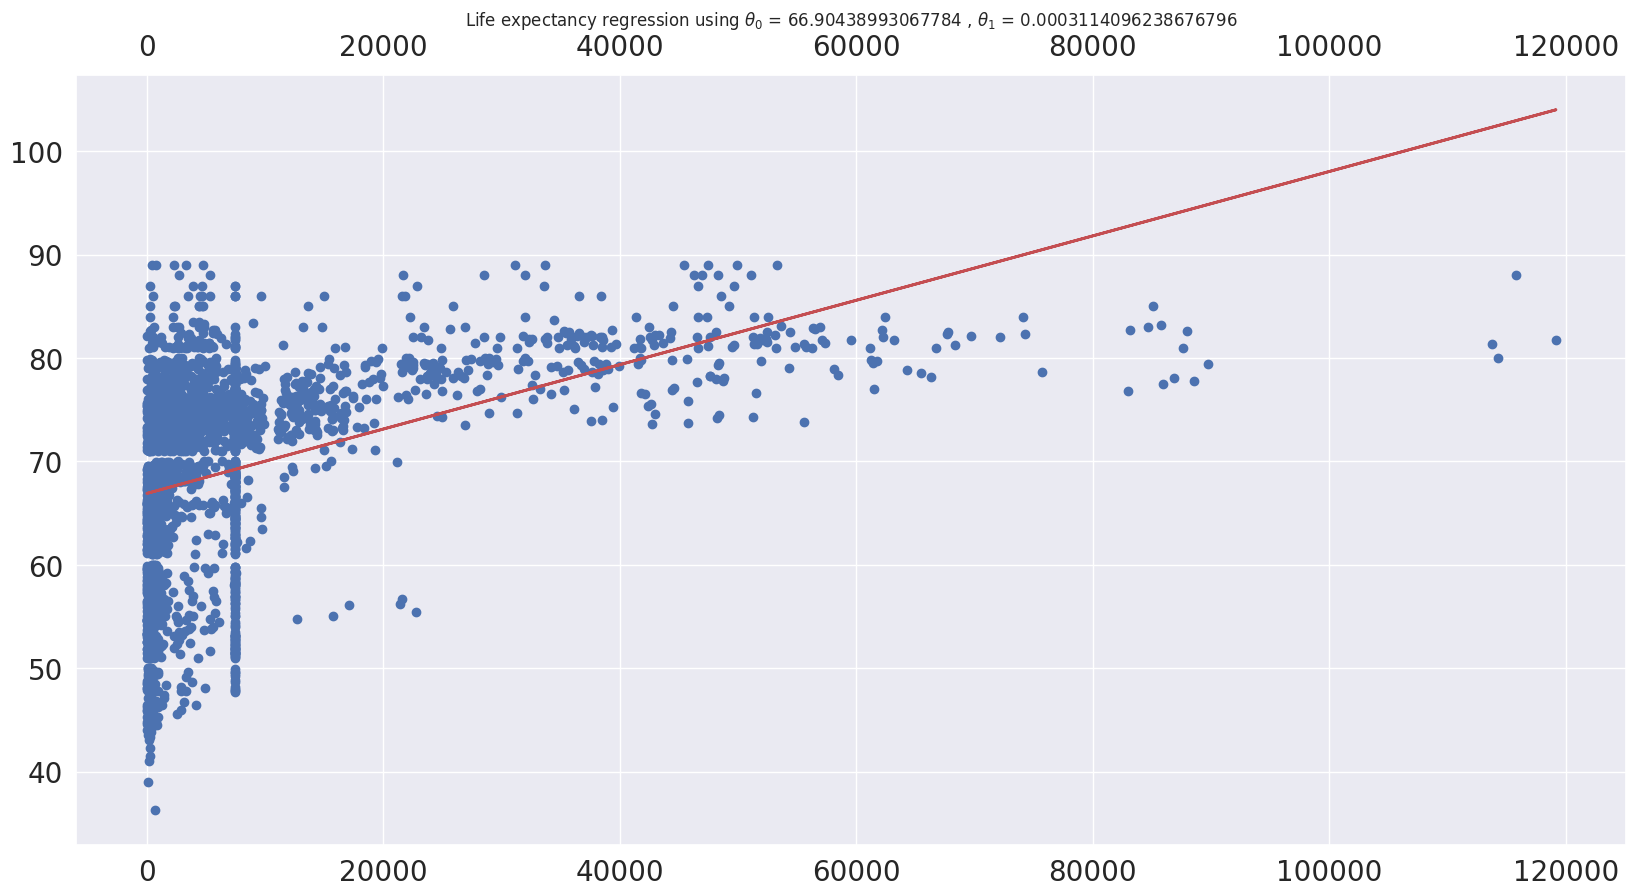

In [30]:
plt.title('Life expectancy regression using $\\theta_0$ = {} , $\\theta_1$ = {}'.format(tom_theta[0], tom_theta[1]))
plt.scatter(tom_data,Y, marker='o')
plt.plot(tom_data,np.dot(tom_data_ready, tom_theta), color='r', linewidth=2)
plt.show()

In [31]:
gdp = 8500 #float(input("Please input the GDP of your country: ")) #8500
life_exp_tom = life_expectancy([gdp], tom_theta)
print("Tom's life expectancy is", life_exp_tom , "years.")

Tom's life expectancy is 69.55137173355311 years.


In [32]:
gdp = 5000 #float(input("Please input the GDP of your country: ")) #5000
life_exp_tom_tim = life_expectancy([gdp], tom_theta)
print("Tim's life expectancy predicted by Tom is", life_exp_tom_tim , "years.")

Tim's life expectancy predicted by Tom is 68.46143805001624 years.


# **MULTIPLE REGRESSION**

**x** - data \
**y** - label

If we have **n** datapoints, then our data and label matrix will look like this.

$ \underset{\left(m,n\right)}{X}=\begin{bmatrix}{\begin{matrix}1{\begin{matrix}\end{matrix}} & x_1^{\left(1\right)} & ... & x_{n}^{\left(1\right)}\\ 1 & x_1^{\left(2\right)} & ... & x_{n}^{\left(2\right)}\\ ... & ... & ... & ...\\ 1 & x_1^{\left(m\right)} & ... & x_{n}^{\left(m\right)}\end{matrix}}\end{bmatrix}, \underset{{\left(n,1\right)}}{y}=\begin{bmatrix}{y^{\left(1\right)}}\\ \begin{matrix}{\begin{matrix}{y^{\left(2\right)}}\\ ...\end{matrix}}\\ y^{\left(n\right)}\end{matrix}\end{bmatrix} $

We want to find $ \underset{\left(n,1\right)}{\theta}=\begin{bmatrix}{\theta}_0\\ \begin{matrix}{\theta_1}\\ ...\\ \theta_{n}\end{matrix}\end{bmatrix} $ for $ h(x) = \hat{y} = \theta x $

If we substitute our ***x*** and $\mathit{\mathbf{\theta}}$ in our hypothesis function we will get:

$ h(x)= \theta x$

In case of linear regression we can use the ***Normal Equation*** to calculate the optimal theta

$ \theta^*= (X^TX)^{-1}(X^TY) $

# **4. Multiple Regression with Tim**

In [33]:
tim_data = X[['BMI', 'Adult_mortality', 'HIV/AIDS']]
tim_data.head()

,BMI,Adult_mortality,HIV/AIDS
0,19.1,263.0,0.1
1,18.6,271.0,0.1
2,18.1,268.0,0.1
3,17.6,272.0,0.1
4,17.2,275.0,0.1


In [34]:
def add_ones(X):
    return np.concatenate([np.ones((X.shape[0], 1)),  X], axis=1)

tim_data_ready = add_ones(tim_data.to_numpy())
tim_data_ready.shape

(2938, 4)

In [35]:
tim_theta = normal_equation(tim_data_ready, Y)
print(f'theta = {tim_theta}')

theta = [ 6.95250308e+01  1.58686254e-01 -3.38199840e-02 -4.58041192e-01]


In [36]:
def RMSE(y_pred, y):
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

tim_y_pred = np.dot(tim_data_ready, tim_theta)
tim_rmse = RMSE(tim_y_pred, Y)

print("Tim's RMSE: ", tim_rmse)

Tim's RMSE:  5.784750918898876


In [37]:
height = 1.82 #float(input("Please input your height (in meters): "))
weight = 80 #float(input("Please input your weight (in kilograms): "))
bmi = weight / height**2
adult_mortality = 53
hiv = 0.1
life_exp_tim = life_expectancy([bmi,adult_mortality,hiv], tim_theta)
print("Tim's life expectancy is", life_exp_tim .round(1), "years.")

Tim's life expectancy is 71.5 years.


In [38]:
height = 1.80 #float(input("Please input your height (in meters): "))
weight = 73 #float(input("Please input your weight (in kilograms): "))
bmi = weight / height**2
adult_mortality = 70
hiv = 0.1
life_exp_tim_tom = life_expectancy([bmi,adult_mortality,hiv], tim_theta)
print("Tom's life expectancy predicted by Tim is", life_exp_tim_tom.round(1) , "years.")

Tom's life expectancy predicted by Tim is 70.7 years.


# **5. Multiple Regression with Tom**

In [39]:
tom_data = X[['GDP', 'Income_composition_of_resources', 'Schooling']]
tom_data.head()

,GDP,Income_composition_of_resources,Schooling
0,584.259210,0.479,10.1
1,612.696514,0.476,10.0
2,631.744976,0.470,9.9
3,669.959000,0.463,9.8
4,63.537231,0.454,9.5


In [40]:
tom_data_ready = add_ones(tom_data)
tom_data_ready.shape

(2938, 4)

In [41]:
tom_theta = normal_equation(tom_data_ready, Y)
print(f'theta = {tom_theta}')

theta = [4.49681347e+01 8.26882411e-05 1.42744076e+01 1.22489350e+00]


In [42]:
def RMSE(y_pred, y):
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

tom_y_pred = np.dot(tom_data_ready, tom_theta)
tom_rmse = RMSE(tom_y_pred, Y)

print("Tom's RMSE: ", tom_rmse)

Tom's RMSE:  6.288890108092894


In [43]:
gdp = 8500
income = 0.8
school = 16.5
life_exp_tom = life_expectancy([gdp,income,school], tom_theta)
print("Tom's life expectancy is", life_exp_tom.round(1) , "years.")

Tom's life expectancy is 77.3 years.


In [44]:
gdp = 5000
income = 0.77
school = 15.5
life_exp_tom_tim = life_expectancy([gdp,income,school], tom_theta)
print("Tim's life expectancy predicted by Tom is", life_exp_tom_tim.round(1) , "years.")

Tim's life expectancy predicted by Tom is 75.4 years.


In [45]:
##CODE HERE

# Solve the problem using an Deep Neural Network

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim

## 1. Preprocessing

### 1.1 Select features

Let's select those features whose positive correlation is >0.4 and negative correlation < -0.5.

In [21]:
correlation = life_exp.corr()
correlation

,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
Year,1.000000,0.170819,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life_expectancy,0.170819,1.000000,-0.696251,-0.196769,0.390675,0.381418,0.203519,-0.157767,0.560453,-0.222738,0.461526,0.208879,0.475378,-0.556703,0.430211,-0.019683,-0.472829,-0.467295,0.692560,0.714358
Adult_mortality,-0.078861,-0.696251,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
Infant_deaths,-0.037415,-0.196769,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.390675,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
Percentage_expenditure,0.031400,0.381418,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
HepatitisB,0.089398,0.203519,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157767,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.560453,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
Under_five_deaths,-0.042937,-0.222738,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


In [48]:
filtered = correlation['Life_expectancy']
filtered

Year                               0.170819
Life_expectancy                    1.000000
Adult_mortality                   -0.696251
Infant_deaths                     -0.196769
Alcohol                            0.390675
Percentage_expenditure             0.381418
HepatitisB                         0.203519
Measles                           -0.157767
BMI                                0.560453
Under_five_deaths                 -0.222738
Polio                              0.461526
Total_expenditure                  0.208879
Diphtheria                         0.475378
HIV/AIDS                          -0.556703
GDP                                0.430211
Population                        -0.019683
 thinness  1-19 years             -0.472829
 thinness 5-9 years               -0.467295
Income_composition_of_resources    0.692560
Schooling                          0.714358
Name: Life_expectancy, dtype: float64

In [49]:
columns = filtered.index.values
columns

array(['Year', 'Life_expectancy', 'Adult_mortality', 'Infant_deaths',
       'Alcohol', 'Percentage_expenditure', 'HepatitisB', 'Measles',
       'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_composition_of_resources', 'Schooling'], dtype=object)

In [50]:
mask = (filtered < -0.5) | (filtered > 0.4)
mask

Year                               False
Life_expectancy                     True
Adult_mortality                     True
Infant_deaths                      False
Alcohol                            False
Percentage_expenditure             False
HepatitisB                         False
Measles                            False
BMI                                 True
Under_five_deaths                  False
Polio                               True
Total_expenditure                  False
Diphtheria                          True
HIV/AIDS                            True
GDP                                 True
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income_composition_of_resources     True
Schooling                           True
Name: Life_expectancy, dtype: bool

In [51]:
filtered_columns = columns[mask][1:]
filtered_columns

array(['Adult_mortality', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Income_composition_of_resources', 'Schooling'], dtype=object)

In [52]:
X = life_exp[filtered_columns]
X.head()

,Adult_mortality,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Income_composition_of_resources,Schooling
0,263.0,19.1,6.0,65.0,0.1,584.259210,0.479,10.1
1,271.0,18.6,58.0,62.0,0.1,612.696514,0.476,10.0
2,268.0,18.1,62.0,64.0,0.1,631.744976,0.470,9.9
3,272.0,17.6,67.0,67.0,0.1,669.959000,0.463,9.8
4,275.0,17.2,68.0,68.0,0.1,63.537231,0.454,9.5


In [53]:
X.describe()

,Adult_mortality,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,164.796448,38.321247,82.550188,82.324084,1.742103,7483.158469,0.627551,11.992793
std,124.080302,19.927677,23.352143,23.640073,5.077785,13136.800417,0.204820,3.264381
min,1.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.000000,0.000000
25%,74.000000,19.400000,78.000000,78.000000,0.100000,580.486996,0.504250,10.300000
50%,144.000000,43.000000,93.000000,93.000000,0.100000,3116.561755,0.662000,12.100000
75%,227.000000,56.100000,97.000000,97.000000,0.800000,7483.158469,0.772000,14.100000
max,723.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,0.948000,20.700000


In [54]:
Y = life_exp['Life_expectancy']
Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life_expectancy, dtype: float64

In [55]:
X.shape, Y.shape

((2938, 8), (2938,))

In [56]:
X = X.to_numpy()
Y = Y.to_numpy()

### 1.2 Normalize values

In [57]:
def standardize(X):
    mu = X.mean()
    sigma = X.std()
    normalized = ( X - mu ) / sigma
    return normalized, mu, sigma

In [58]:
x_norm, mu, sigma = standardize(X)

### 1.3 Shuffle and split dataset

Use a train:validation:test split ration of 6:2:2

In [59]:
dataset = np.concatenate((x_norm, Y[:,None]), axis=1)
dataset.shape

(2938, 9)

In [60]:
from sklearn.model_selection import train_test_split

# implement your solution BELOW
data_train, rest = train_test_split(dataset, train_size=0.6, shuffle=True)
data_val, data_test = train_test_split(rest, train_size=0.5)

print((data_train.shape, data_val.shape, data_test.shape))

((1762, 9), (588, 9), (588, 9))


In [61]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

    def __init__(self, dataset):
        self.features = torch.from_numpy(dataset[:,:-1]).float()
        self.labels = torch.from_numpy(dataset[:,-1]).float().unsqueeze(1)

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        return self.features[idx, :], self.labels[idx]


train_dataset = CustomDataset(data_train)
val_dataset = CustomDataset(data_val)
test_dataset = CustomDataset(data_test)

dataloader_train = DataLoader(train_dataset, batch_size=32, shuffle=True)
dataloader_val = DataLoader(val_dataset, batch_size=32, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=32, shuffle=False)


## 2. Define DataLoader and Model

In [62]:
# implement your solution BELOW
class CustomModel(nn.Module):
    def __init__(self, in_features):
        super(CustomModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, X):
        return self.model(X)

Epoch 0/200, Train Loss: 6102.595703125, Val Loss: 4953.0283203125
Epoch 10/200, Train Loss: 2862.83837890625, Val Loss: 2111.593505859375
Epoch 20/200, Train Loss: 636.7042236328125, Val Loss: 320.8240051269531
Epoch 30/200, Train Loss: 59.794063568115234, Val Loss: 58.6087760925293
Epoch 40/200, Train Loss: 58.898460388183594, Val Loss: 40.4240608215332
Epoch 50/200, Train Loss: 69.2608413696289, Val Loss: 56.9272575378418
Epoch 60/200, Train Loss: 38.48622131347656, Val Loss: 22.441946029663086
Epoch 70/200, Train Loss: 18.650909423828125, Val Loss: 72.29264831542969
Epoch 80/200, Train Loss: 37.32881546020508, Val Loss: 53.0180549621582
Epoch 90/200, Train Loss: 118.40205383300781, Val Loss: 57.76023864746094
Epoch 100/200, Train Loss: 30.945518493652344, Val Loss: 86.01058197021484
Epoch 110/200, Train Loss: 9.037251472473145, Val Loss: 36.997135162353516
Epoch 120/200, Train Loss: 15.778244972229004, Val Loss: 23.378000259399414
Epoch 130/200, Train Loss: 3.8428943157196045, Val 

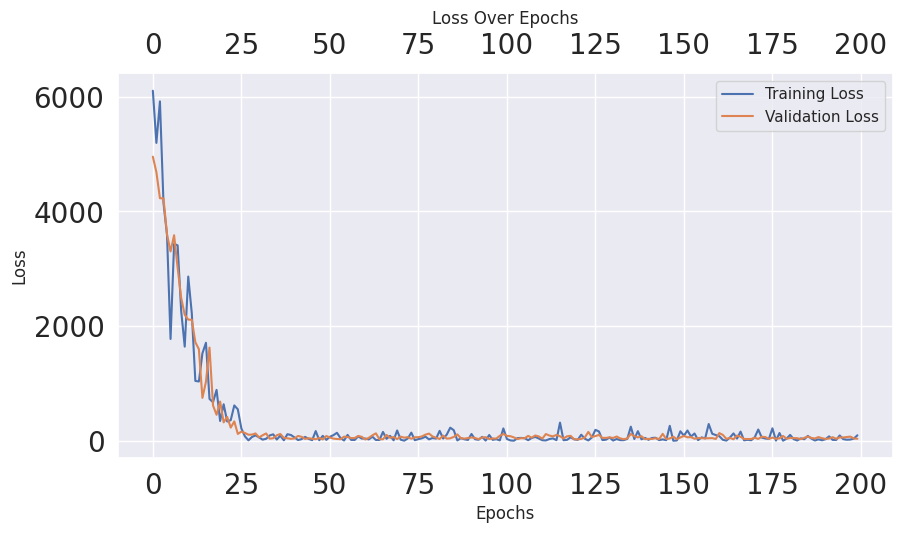

In [64]:
model = CustomModel(in_features=8)
lossfn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with early stopping
num_epochs = 200
patience = 20
best_val_loss = float('inf')
patience_counter = 0
best_model_wts = None

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    for x, y in dataloader_train:
    # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(x)
        loss = lossfn(outputs, y)
        loss.backward()
        optimizer.step()

    train_losses.append(loss.mean().item())

    # Validation phase
    model.eval()
    with torch.no_grad():
        for x, y in dataloader_val:
            val_outputs = model(x)
            val_loss = lossfn(val_outputs, y)
            
    val_losses.append(val_loss.mean().item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}")
    best_model_wts = model.state_dict()

# Load the best model weights (if saved)

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

best_model = model.load_state_dict(best_model_wts)

### Make a prediction for Tim and Tom:

## Tim:
Adult Mortality: 53 \
BMI = 24.2 \
Polio: 98 \
Difteria: 98 \
HIV: 0.1 \
GDP = 5000 \
Income = 0.77 \
School = 15.5

### Tom:
Adult Mortality: 70 \
BMI = 22.5 \
Polio: 97 \
Difteria: 97 \
HIV: 0.1 \
GDP = 8500 \
Income = 0.8 \
School = 16.5

In [65]:
tim = [53, 24.2, 98, 98, 0.1, 5000, 0.77, 15.5]
tom = [70, 22.5, 97, 97, 0.1, 8500, 0.8, 16.5]

# Standardize the inputs and run a prediction

In [66]:
tim_std = (tim - mu) / sigma
tom_std = (tom - mu) / sigma
(tim_std, tom_std)

(array([-0.17704225, -0.18252374, -0.16847743, -0.16847743, -0.18711067,
         0.76451685, -0.18698315, -0.1841796 ]),
 array([-0.17380666, -0.1828473 , -0.16866776, -0.16866776, -0.18711067,
         1.43066945, -0.18697744, -0.18398927]))

In [67]:
with torch.no_grad():
    life_exp_tim = model(torch.Tensor(tim_std))

print(f'Tim\'s life expectancy is {life_exp_tim.numpy().round(2)} years')

Tim's life expectancy is [72.92] years


In [68]:
with torch.no_grad():
    life_exp_tim = model(torch.Tensor(tom_std))

print(f'Tom\'s life expectancy is {life_exp_tim.numpy().round(2)} years')

Tom's life expectancy is [73.29] years


## 3. Implement Early Stopping

In [ ]:
model = CustomModel(in_features=8)
lossfn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with early stopping
num_epochs = 200
patience = 20
best_val_loss = float('inf')
patience_counter = 0
best_model_wts = None

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    for x, y in dataloader_train:
    # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(x)
        loss = lossfn(outputs, y)
        loss.backward()
        optimizer.step()

    train_losses.append(loss.mean().item())

    # Validation phase
    model.eval()
    with torch.no_grad():
        for x, y in dataloader_val:
            val_outputs = model(x)
            val_loss = lossfn(val_outputs, y)
            
    val_losses.append(val_loss.mean().item())

    # Check early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # Save the best model (optional)
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}")

# Load the best model weights (if saved)

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

best_model = model.load_state_dict(best_model_wts)